# **Kegiatan Modul 4**

**Poin penilaian :**

* Tingkat kesesuaian program
* Kesesuaian step preprocessing dan pemodelan
* Penjelasan yang tepat
* Kerapian kode program
* Tidak ada error

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import wget
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Tentang dataset

Kita akan menggunakan data telekomunikasi untuk memprediksi churn pelanggan. Ini adalah data pelanggan historis di mana setiap baris mewakili satu pelanggan. Data ini relatif mudah dipahami, dan Anda dapat mengungkap wawasan yang dapat Anda gunakan segera. Biasanya lebih murah untuk mempertahankan pelanggan daripada membeli yang baru, jadi fokus analisis ini adalah untuk memprediksi pelanggan yang akan tinggal di perusahaan.

Kumpulan data ini menyediakan info untuk membantu Anda memprediksi perilaku mempertahankan pelanggan. Anda dapat menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus.

Kumpulan data mencakup informasi tentang:

- Pelanggan yang pergi dalam sebulan terakhir - kolom ini disebut Churn
- Layanan yang telah ditandatangani oleh setiap pelanggan - telepon, banyak saluran, internet, keamanan online, cadangan online, perlindungan perangkat, dukungan teknis, dan streaming TV dan film
- Informasi akun pelanggan - berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, penagihan tanpa kertas, biaya bulanan, dan total biaya
- Info demografis tentang pelanggan - jenis kelamin, rentang usia, dan jika mereka memiliki mitra dan tanggungan

### **Download the Telco Churn data**

Telco Churn adalah file data hipotetis yang menyangkut upaya perusahaan telekomunikasi untuk mengurangi turnover di basis pelanggannya. Setiap kasing sesuai dengan pelanggan terpisah dan mencatat berbagai informasi penggunaan layanan dan demografis. Sebelum Anda dapat bekerja dengan data, Anda harus menggunakan URL untuk mendapatkan ChurnData.csv.

Untuk mengunduh data, kami akan menggunakan `!wget` untuk mengunduhnya dari IBM Object Storage.

In [2]:
# wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv')

## **SOAL-SOAL**

Kegiatan 1. **5 poin**

Load dataset dari file csv.

In [3]:
# TULIS CODE ANDA DISINI
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0




```
# Output tabel
```


<img src = "https://i.ibb.co/Ss0mQk3/1.png" align = "center">

### **Data pre-processing and selection**

Kegiatan 2. **10 poin**

Mari kita pilih beberapa fitur untuk pemodelan dalam kasus ini kita akan memilih fitur `tenure, age, address, income, ed, employ, equip, callcard, wireless, churn`. 

Kita juga mengubah tipe data target menjadi bilangan bulat, sebab merupakan persyaratan oleh algoritma pembelajaran scikit:

In [4]:
# TULIS CODE ANDA DISINI
# df1 = df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
df1 = df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
df1.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0




```
# Output tabel
```


<img src = "https://i.ibb.co/zmc2YP0/2.png" align = "center">

Kegiatan 3. **5 poin**

Berapa ukuran dataset yang anda miliki sekarang? (row, coloumn)



```
# Output

  (200, 10)
```



In [5]:
# TULIS CODE ANDA DISINI
df1.shape

(200, 10)

Kegiatan 4. **5 poin**

Tentukan x, dan y untuk dataset kita: 

**HINT!** ubah ke numpy array



```
# Output

  array([[ 11.,  33.,   7., 136.,   1.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   0.,   0.,   1.],
       [ 23.,  30.,   9.,  30.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])
```





```
# Output

  array([1, 1, 0, 0, 0])
```



In [6]:
# TULIS CODE ANDA DISINI
fea = ['tenure','age','address','income','ed','employ','equip']
fea2 = ['callcard','wireless','churn']
x = df1[fea].values
y = df1[fea2]

for i, col in enumerate(y.columns.tolist(), 1):
    y.loc[:, col] *= i
y = y.sum(axis=1)

x

C:\Users\blackou\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


array([[11., 33.,  7., ...,  5.,  5.,  0.],
       [33., 33., 12., ...,  2.,  0.,  0.],
       [23., 30.,  9., ...,  1.,  2.,  0.],
       ...,
       [ 6., 32., 10., ...,  1., 10.,  0.],
       [24., 30.,  0., ...,  4.,  5.,  0.],
       [61., 50., 16., ...,  2., 22.,  1.]])

Kegiatan 5. **5 poin**

Normalisasi dataset:

**HINT** library preprocessing dari sklearn.



```
# Output

  array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])
```



In [7]:
# TULIS CODE ANDA DISINI
X = preprocessing.scale(x)
# Y = preprocessing.scale(y)
X

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.42318853,
        -0.92053635, -0.85972695],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -1.42318853,
        -0.02518185, -0.85972695],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.91629947,
        -0.58477841, -0.85972695],
       [ 1.18104577,  0.67731925,  0.42929083, ..., -0.6433592 ,
         1.31784991,  1.16316   ]])

Kegiatan 6. **5 poin**

Selanjutnya kita akan membagi dataset Anda menjadi train dan test set dengan porsi perbandingan 80:20 dan `random_state`tak didefinisikan:



```
# Output

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)
```



In [8]:
# TULIS CODE ANDA DISINI
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(160, 7) (160,)
(40, 7) (40,)




--- 
Perhatikan materi modul 4 bagian **Modeling (Logistic Regression with Scikit-learn)**
---


---





Kegiatan 7. **30 poin per model**

*POIN MAKSIMAL 60*

Buatlah 2 model Logistic Regression baru untuk dataset yang sama, tetapi kali ini, gunakan nilai __solver__ dan __regularisasi__ yang berbeda? Apa nilai __logLoss__ baru?

### *Ikuti step pengerjaan dibawah:*

Penilaian mulai dari:

* Membuat model

* Melakukan dan menampilkan hasil  prediksi data test `yhat dan yhat_prob`

* Evaluation menggunakan confussion matrix.

* Tampilkan hasil `classification_report`

* Tampilkan hasil `log_loss`

* Jelaskan semua hal yang anda menggerti atau hal yang anda dapatkan dalam modul ini.

### **BONUS 5 POIN jika semua kegiatan dapat diselesaikan dengan baik dan dapat menjelaskan semua kegiatan dengan fasih.**

In [9]:
# TULIS CODE ANDA DISINI

LogRes1 = LogisticRegression(C=0.0001, solver='sag')
LogRes2 = LogisticRegression(C=0.01, solver='lbfgs')
LR = LogRes1.fit(X_train,y_train)
LR2 = LogRes2.fit(X_train,y_train)
print(LR)
print(LR2)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\blackou\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\blackou\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\blackou\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [10]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(yhat)
print(yhat_prob)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.1250781  0.37426505 0.01895029 0.31210788 0.05028623 0.02550181
  0.09381064]
 [0.12512828 0.37257151 0.01896788 0.31345465 0.05029855 0.02552967
  0.09404946]
 [0.12464047 0.37423394 0.01894532 0.31257586 0.0501843  0.02549092
  0.09392918]
 [0.12439143 0.3752585  0.01893457 0.31202535 0.05012138 0.02546573
  0.09380305]
 [0.12451179 0.37704531 0.01893043 0.31060679 0.05013511 0.02542677
  0.0933438 ]
 [0.12489526 0.37409461 0.01896051 0.31260894 0.05018834 0.02550211
  0.09375023]
 [0.12464767 0.37709255 0.01894713 0.31043641 0.05015264 0.0254359
  0.0932877 ]
 [0.12530843 0.37391687 0.01895646 0.312299   0.05036957 0.02549001
  0.09365967]
 [0.12539786 0.371531   0.01897826 0.31401125 0.05036047 0.0255567
  0.09416447]
 [0.12522025 0.37427933 0.0189523  0.31206139 0.05032118 0.02549615
  0.09366939]
 [0.12536709 0.37405015 0.01896661 0.31213315 0.05034823 0.

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Fungsi ini mencetak dan memplot matriks kebingungan.
    Normalisasi dapat diterapkan dengan mengatur `normalize = True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [12]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[22  0]
 [ 6  0]]


Confusion matrix, without normalization
[[22  0]
 [ 6  0]]


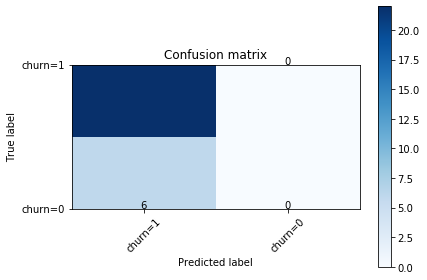

In [13]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [14]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.55      1.00      0.71        22
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         4

    accuracy                           0.55        40
   macro avg       0.09      0.17      0.12        40
weighted avg       0.30      0.55      0.39        40



C:\Users\blackou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
